# 📝 Exercise M6.03

This exercise aims at verifying if AdaBoost can over-fit.
We will make a grid-search and check the scores by varying the
number of estimators.

We will first load the California housing dataset and split it into a
training and a testing set.

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0, test_size=0.5)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Then, create an `AdaBoostRegressor`. Use the function
`sklearn.model_selection.validation_curve` to get training and test scores
by varying the number of estimators. Use the mean absolute error as a metric
by passing `scoring="neg_mean_absolute_error"`.
*Hint: vary the number of estimators between 1 and 60.*

In [26]:
# Write your code here.
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import validation_curve
import pandas as pd
import numpy as np

n_estimators = np.arange(1, 100, 2)
n_estimators

model = AdaBoostRegressor()
model.get_params()
train_scores, test_scores = validation_curve(
   model, data, target, param_name="n_estimators", param_range=n_estimators,
  cv=5, scoring="neg_mean_absolute_error", n_jobs=2)

In [20]:
train_errors, test_errors = -train_scores, -test_scores

Plot both the mean training and test errors. You can also plot the
standard deviation of the errors.
*Hint: you can use `plt.errorbar`.*

<ErrorbarContainer object of 3 artists>

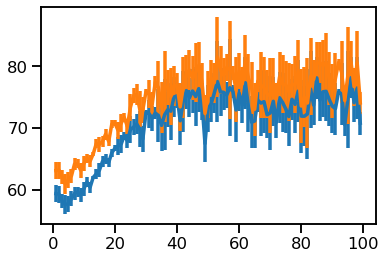

In [23]:
# Write your code here.
from matplotlib import pyplot as plt

plt.errorbar(n_estimators, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label="Training error")

plt.errorbar(n_estimators, test_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label="Testing error")

Plotting the validation curve, we can see that AdaBoost is not immune against
overfitting. Indeed, there is an optimal number of estimators to be found.
Adding too many estimators is detrimental for the statistical performance of
the model.

Repeat the experiment using a random forest instead of an AdaBoost regressor.

In [ ]:
# Write your code here.
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
train_scores, test_scores = validation_curve(
   model, data, target, param_name="n_estimators", param_range=n_estimators,
  cv=5, scoring="neg_mean_absolute_error", n_jobs=2)

# PLOT
plt.errorbar(n_estimators, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label="Training error")

plt.errorbar(n_estimators, test_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label="Testing error")